## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2025-04-20 10:12:54.053713: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-20 10:12:54.053920: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-20 10:12:54.053932: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-20 10:12:54.054226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-20 10:12:54.054241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[190.25 189.25 197.25]
   [188.   187.   195.  ]
   [180.75 179.75 187.75]
   ...
   [159.75 157.75 170.75]
   [158.   156.   169.  ]
   [170.25 168.25 181.25]]

  [[185.   184.   192.  ]
   [183.25 182.25 190.25]
   [180.5  179.5  187.5 ]
   ...
   [157.75 155.75 168.75]
   [164.5  162.5  175.5 ]
   [164.5  162.5  175.5 ]]

  [[178.75 177.75 185.75]
   [181.25 180.25 188.25]
   [181.75 180.75 188.75]
   ...
   [160.   158.   171.  ]
   [161.5  159.5  172.5 ]
   [162.   160.   173.  ]]

  ...

  [[142.75 139.75 148.75]
   [136.   133.   142.  ]
   [138.75 135.75 144.75]
   ...
   [116.   116.   126.  ]
   [131.25 131.25 141.25]
   [141.   141.   151.  ]]

  [[152.5  149.5  158.5 ]
   [154.5  151.5  160.5 ]
   [138.75 135.75 144.75]
   ...
   [133.75 136.75 145.75]
   [120.   123.   132.  ]
   [139.   142.   151.  ]]

  [[147.25 144.25 153.25]
   [150.75 147.75 156.75]
   [131.5  128.5  137.5 ]
   ...
   [119.5  122.5  131.5 ]
   [133.75 136.75 145.75]
   [126.5  129.5  13

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/envs/tf_mac/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


In [23]:
import tensorflow as tf


In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-04-20 10:15:46.846018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 616s 276ms/step - accuracy: 0.3790 - loss: 2.2343 - val_accuracy: 0.8293 - val_loss: 0.5549
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 633s 288ms/step - accuracy: 0.7968 - loss: 0.6792 - val_accuracy: 0.8873 - val_loss: 0.3736
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 758s 345ms/step - accuracy: 0.8723 - loss: 0.4243 - val_accuracy: 0.9130 - val_loss: 0.2963
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 601s 273ms/step - accuracy: 0.8999 - loss: 0.3334 - val_accuracy: 0.9336 - val_loss: 0.2199
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 625s 284ms/step - accuracy: 0.9208 - loss: 0.2680 - val_accuracy: 0.9383 - val_loss: 0.2128
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 634s 288ms/step - accuracy: 0.9380 - loss: 0.2178 - val_accuracy: 0.9526 - val_loss: 0.1672
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 630s 287ms/step - accuracy: 0.9480 - loss: 0.1845 - val_accuracy: 0.9507 - val_loss: 0.1909
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 667s 304ms/step - accuracy: 0.9

### Model Training

## Model Evaluation

In [25]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 67ms/step - accuracy: 0.9820 - loss: 0.0607


In [26]:
print(train_loss,train_acc)

0.0569070540368557 0.9834839105606079


In [27]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.9541 - loss: 0.1853


In [28]:
print(val_loss,val_acc)

0.18661145865917206 0.9540177583694458


### Saving Model

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.5674941539764404,
  0.8208407163619995,
  0.8804182410240173,
  0.908585250377655,
  0.9261114001274109,
  0.9410200119018555,
  0.9495269656181335,
  0.956938624382019,
  0.9611209630966187,
  0.9667970538139343],
 'loss': [1.4959743022918701,
  0.5988591313362122,
  0.3971026539802551,
  0.30669036507606506,
  0.2538864016532898,
  0.20918089151382446,
  0.182269886136055,
  0.154408797621727,
  0.14393235743045807,
  0.1291746348142624],
 'val_accuracy': [0.8292738199234009,
  0.887263834476471,
  0.9130434989929199,
  0.9335875511169434,
  0.9382540583610535,
  0.952595055103302,
  0.9506601691246033,
  0.9554404616355896,
  0.9598793387413025,
  0.9540177583694458],
 'val_loss': [0.5548799633979797,
  0.37364426255226135,
  0.2962883710861206,
  0.21994350850582123,
  0.21278613805770874,
  0.16720494627952576,
  0.19089694321155548,
  0.18740573525428772,
  0.16782645881175995,
  0.18661147356033325]}

In [31]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history['val_accuracy']

[0.8292738199234009,
 0.887263834476471,
 0.9130434989929199,
 0.9335875511169434,
 0.9382540583610535,
 0.952595055103302,
 0.9506601691246033,
 0.9554404616355896,
 0.9598793387413025,
 0.9540177583694458]

### Accuracy Visualization

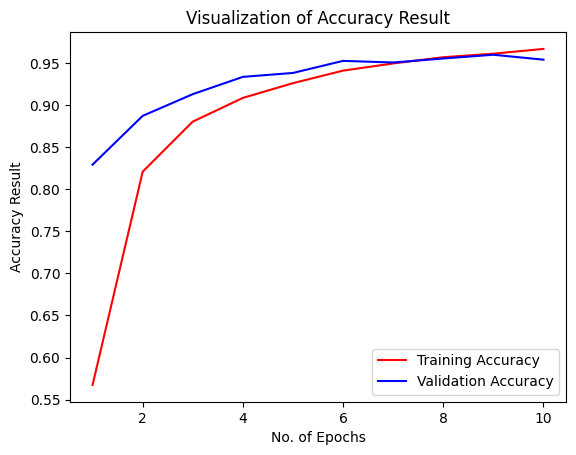

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step


(array([[1.00000000e+00, 4.34631902e-16, 1.30151017e-18, ...,
         2.69756533e-26, 8.88930120e-23, 1.59993293e-25],
        [1.00000000e+00, 4.71560670e-13, 3.76455120e-14, ...,
         1.11854067e-25, 6.73578756e-18, 3.57033690e-21],
        [1.00000000e+00, 5.98502032e-17, 1.02733574e-17, ...,
         8.44492670e-26, 4.19201474e-23, 3.01850974e-22],
        ...,
        [5.20328865e-17, 1.90042888e-20, 1.77547836e-15, ...,
         7.89405859e-19, 1.52688244e-17, 1.00000000e+00],
        [7.06111255e-12, 1.64063294e-16, 6.26777796e-12, ...,
         2.50559230e-12, 2.88710265e-14, 9.99999881e-01],
        [1.04976274e-16, 4.25513947e-15, 4.92597933e-17, ...,
         7.05086637e-17, 9.95726613e-13, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-04-20 12:08:43.626570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

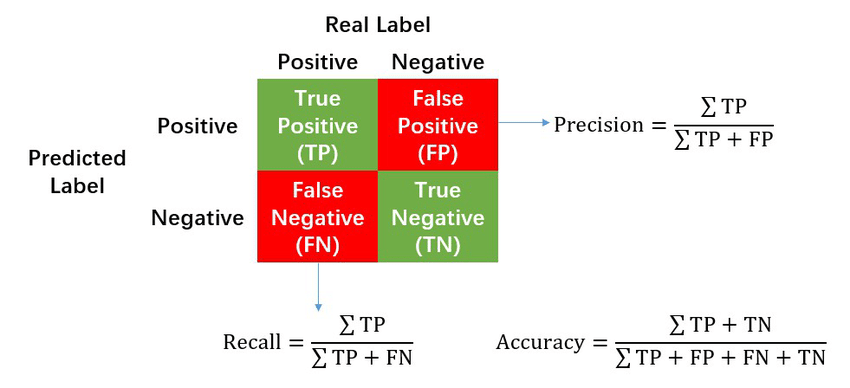

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.97      0.96       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.93      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [43]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[470,   6,   2, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 426, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   1, ...,   0, 433,   0],
       [  0,   0,   0, ...,   0,   0, 464]])

### Confusion Matrix Visualization

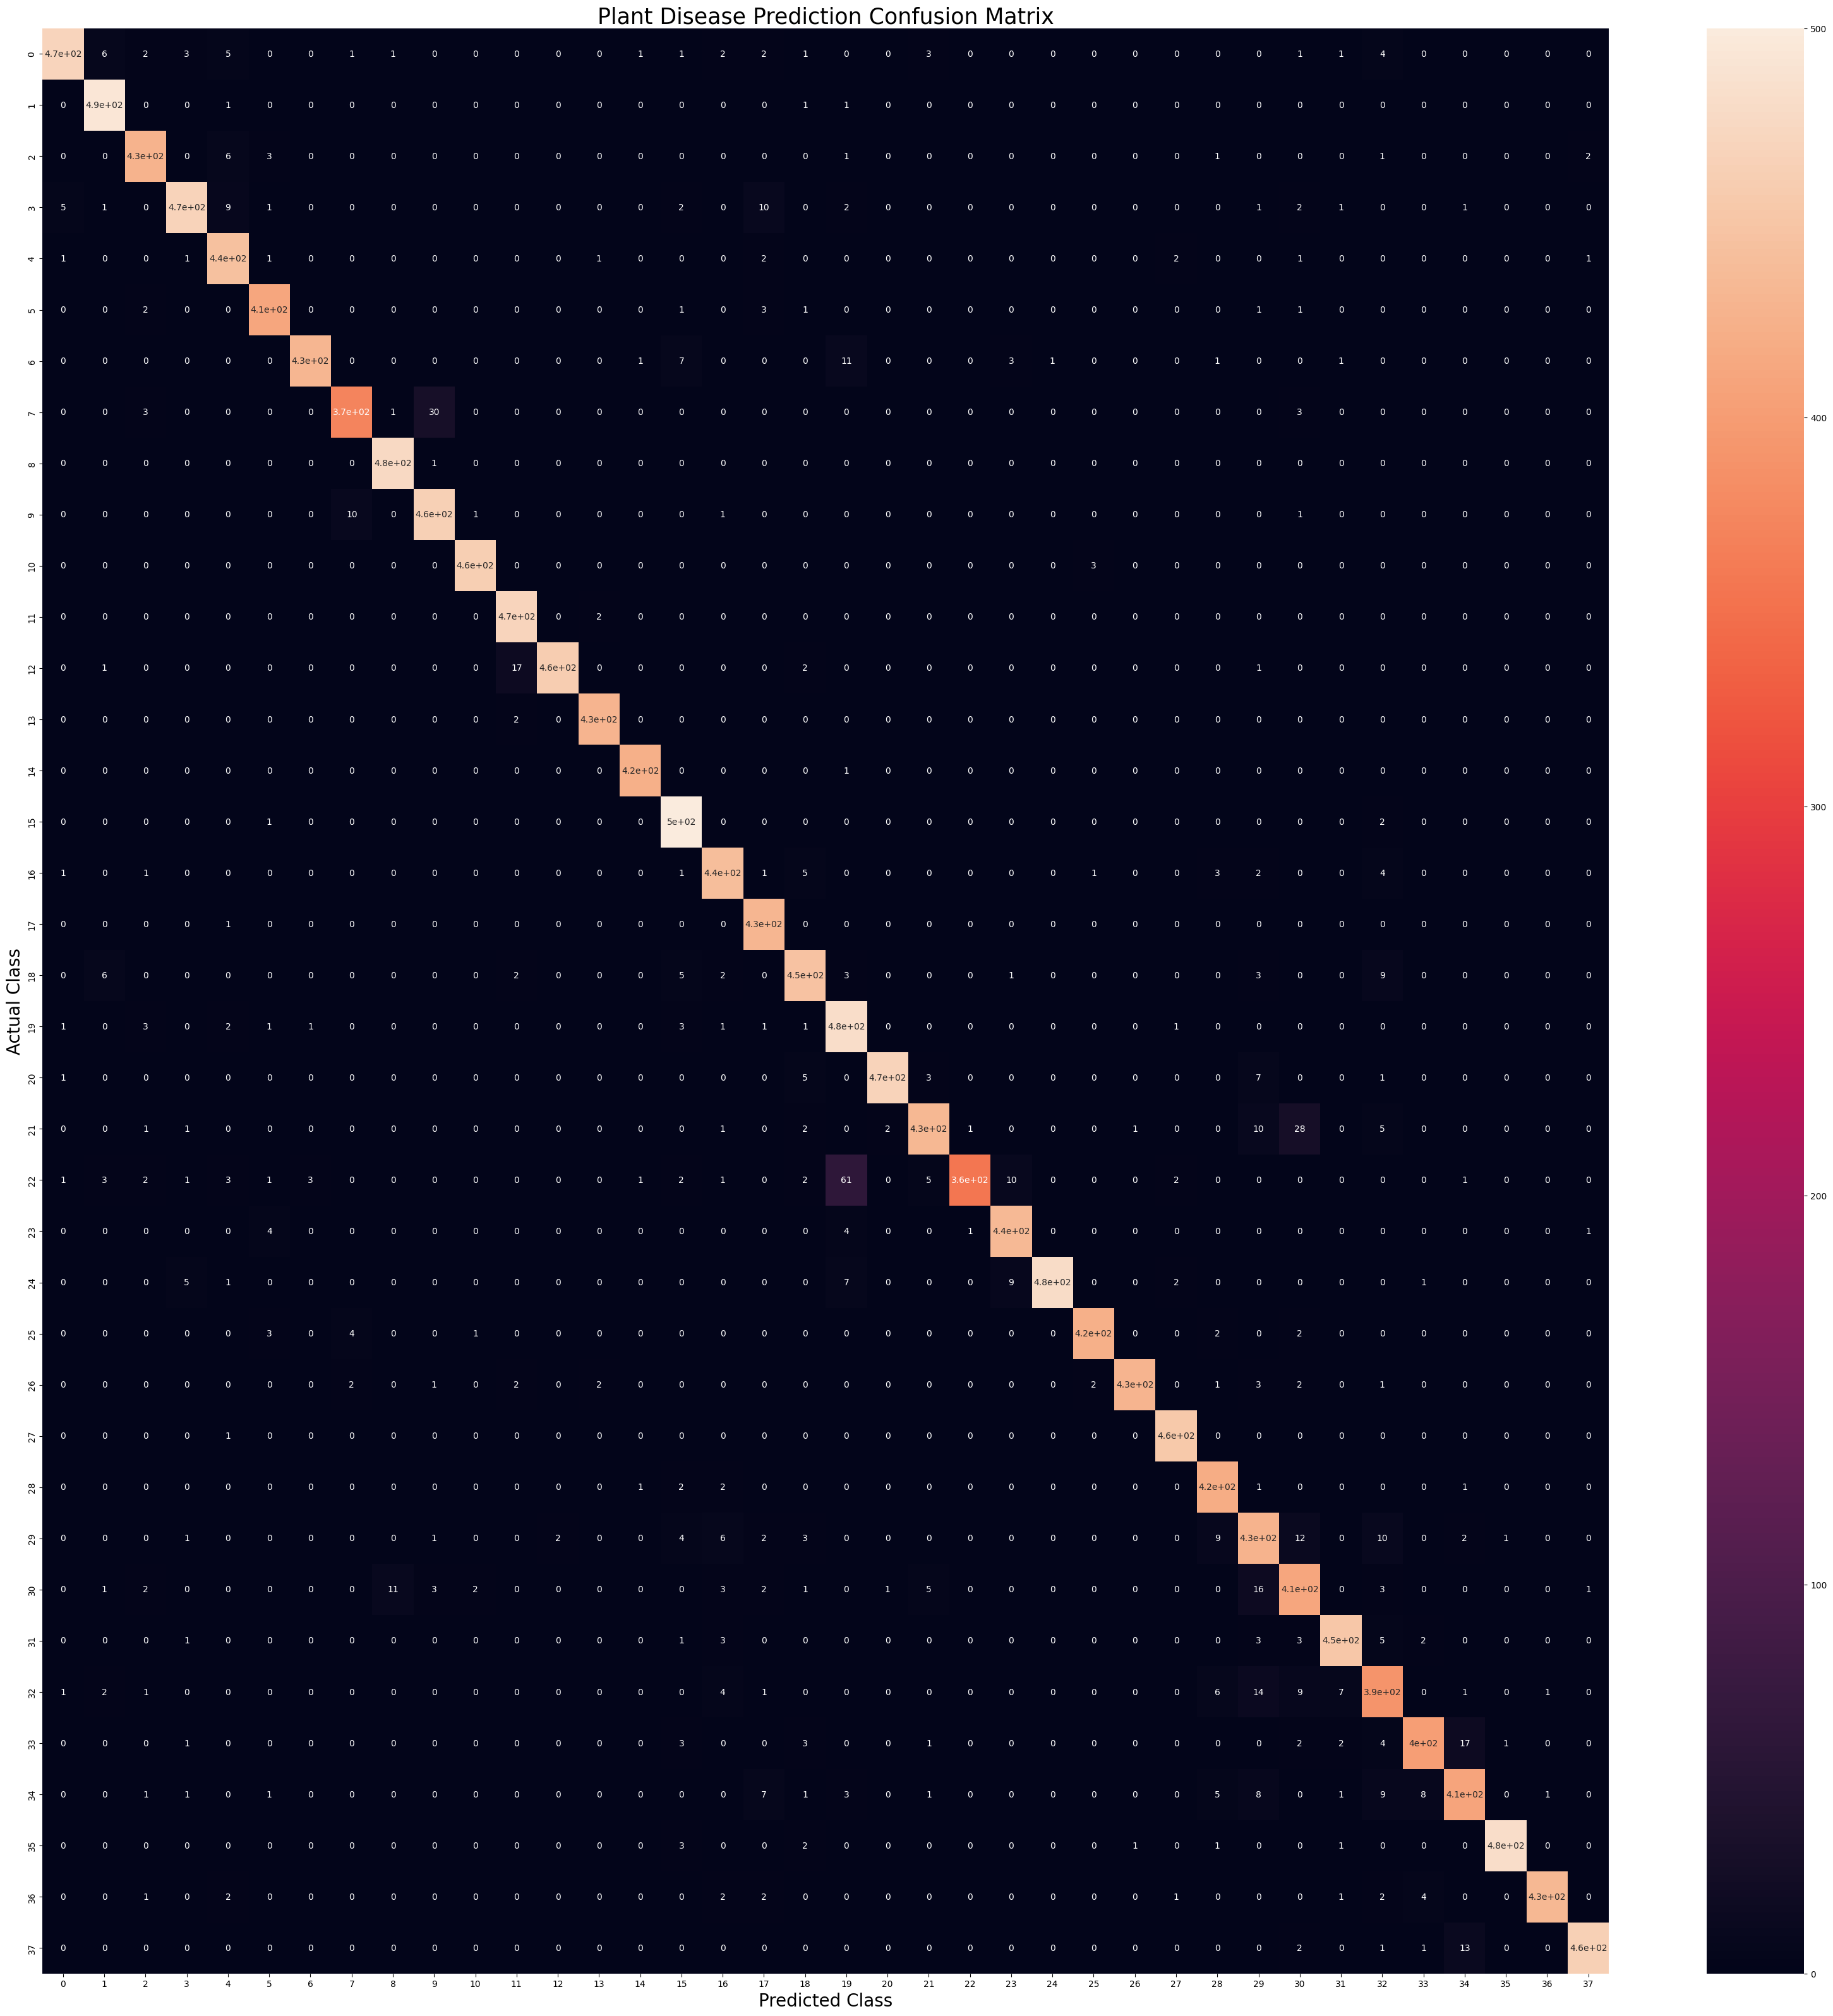

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()